<a href="https://colab.research.google.com/github/Ruwai/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
df.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [2]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
1. Use pandas to make a **crosstab** of **`Year`** & **`Occupation`**. ([This documentation](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations) has examples and explanation.)
2. To get percentages instead of counts, use crosstab's **`normalize`** parameter to normalize over each _row._ ([This documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) describes the parameter and its options.)
3. You'll know you've calculated the crosstab correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus:** Do insightful data exploration in addition to the crosstab.

In [3]:
crosstab = pd.crosstab(index=df['Year'], columns=df['Occupation'],
                       normalize='index')
crosstab

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


# Part 2 — Recreate this explanatory visualization:

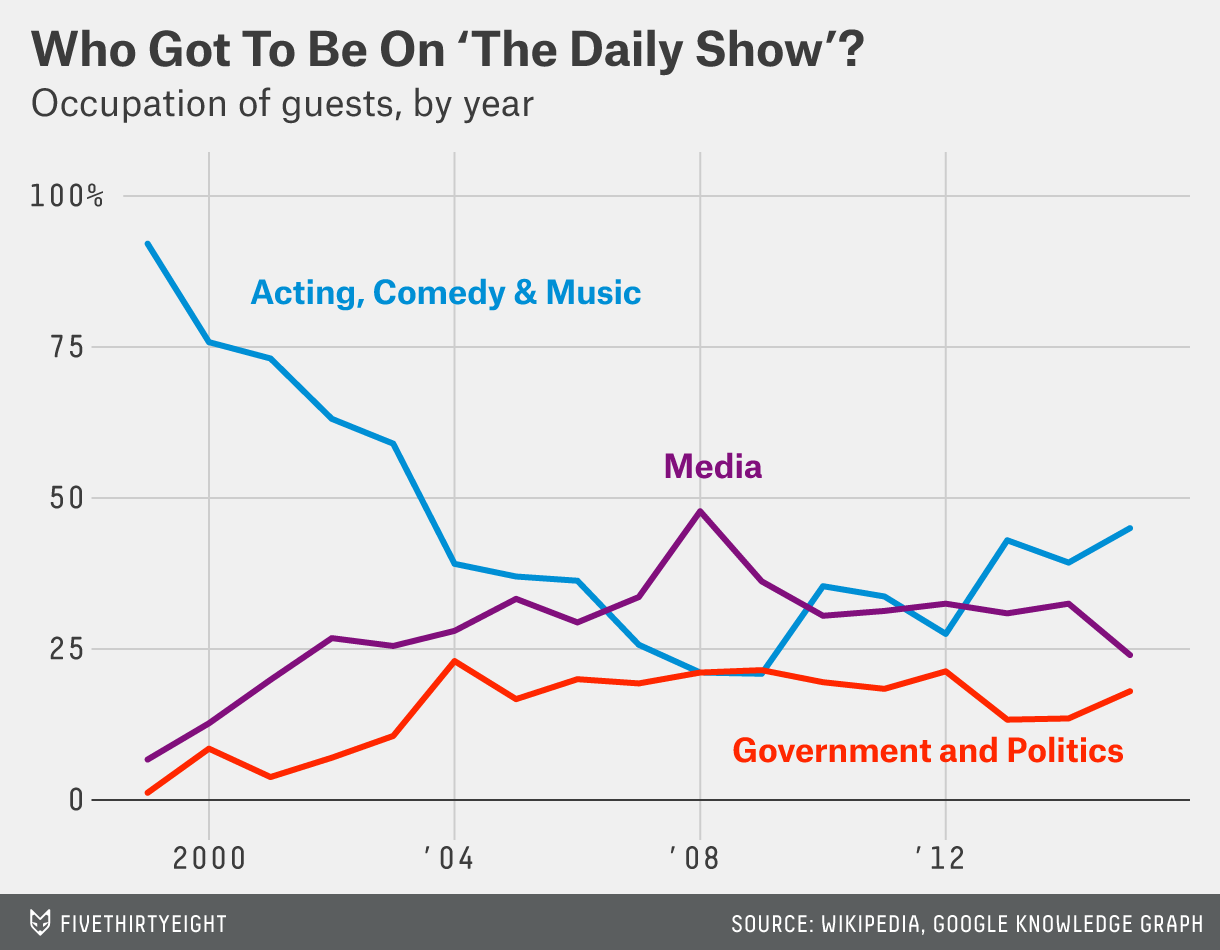

In [4]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(url, width=500)
display(example)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
guests = crosstab.drop(labels='Other', axis='columns')
guests.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,0.903614,0.012048,0.066265
2000,0.739645,0.082840,0.124260
2001,0.726115,0.038217,0.197452
2002,0.622642,0.069182,0.264151
2003,0.560241,0.102410,0.246988


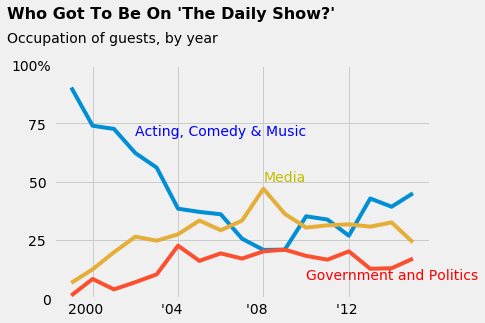

In [6]:
plt.style.use('fivethirtyeight')
ax=guests.plot(scaley=False,legend=False);
ax.text(1996,1.2,s='Who Got To Be On \'The Daily Show?\'',
        fontsize=16,fontweight='bold');
ax.text(1996,1.1,s='Occupation of guests, by year');
ax.text(2002,0.7,s='Acting, Comedy & Music',color='b');
ax.text(2008,0.5,s='Media',color='y');
ax.text(2010,0.08,s='Government and Politics',color='r')
ax.tick_params(labelsize=14)
ax.set_yticks(ticks=[0,0.25,0.50,0.75,1])
ax.set_xticks(ticks=[2000,2004,2008,2012])
ax.set_yticklabels(labels= ['0', '25 ','50 ','75 ','100%'])
ax.set_xticklabels(labels= ['2000   ','\'04   ','\'08   ','\'12 '])
ax.xaxis.label.set_visible(False)


**Hints:**
- You may want to use the crosstab you calculated in part 1!
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume altair would work too.
- Different visualization libraries have different expectations about how data is formatted, so you probably need to do some wrangling.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0 (` !pip install --upgrade seaborn`) and restart your runtime.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus, but it's _not_ required to pass the Sprint Challenge.






# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Hint:** you can use the pandas `value_counts` method.

**Expectations:** This can be a simple, quick plot: exploratory, not explanatory. 

**Optional Bonus:** You can add titles and change aesthetics, but it's _not_ required to pass the Sprint Challenge.

In [7]:
appearances = df['Guest'].value_counts()
appearances

Fareed Zakaria               19
Denis Leary                  17
Brian Williams               16
Paul Rudd                    13
Ricky Gervais                13
Tom Brokaw                   12
Bill O'Reilly                10
Richard Lewis                10
Will Ferrell                 10
Reza Aslan                   10
Sarah Vowell                  9
Adam Sandler                  8
Mike Huckabee                 8
Ben Affleck                   8
Maggie Gyllenhaal             8
Louis C.K.                    8
Doris Kearns Goodwin          7
Steve Carell                  7
Michael Moore                 7
Samuel L. Jackson             7
Bob Dole                      7
Jeff Garlin                   7
Bill Clinton                  7
Colin Firth                   7
Newt Gingrich                 6
Austan Goolsbee               6
Jon Meacham                   6
Tim Gunn                      6
Jake Gyllenhaal               6
Bill Kristol                  6
                             ..
Allan Br

In [8]:
df_appearances = appearances.to_frame().reset_index().rename(columns={'index':'Guest',
                                                                      'Guest':'Count'})
df_appearances

,Guest,Count
0,Fareed Zakaria,19
1,Denis Leary,17
2,Brian Williams,16
3,Paul Rudd,13
4,Ricky Gervais,13
5,Tom Brokaw,12
6,Bill O'Reilly,10
7,Richard Lewis,10
8,Will Ferrell,10
9,Reza Aslan,10


In [9]:
top_appearances = df_appearances.nlargest(10, 'Count')
top_appearances

,Guest,Count
0,Fareed Zakaria,19
1,Denis Leary,17
2,Brian Williams,16
3,Paul Rudd,13
4,Ricky Gervais,13
5,Tom Brokaw,12
6,Bill O'Reilly,10
7,Richard Lewis,10
8,Will Ferrell,10
9,Reza Aslan,10


In [61]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 8.8MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1
  [seaborn]
You must restart the runtime in order to use newly installed versions.


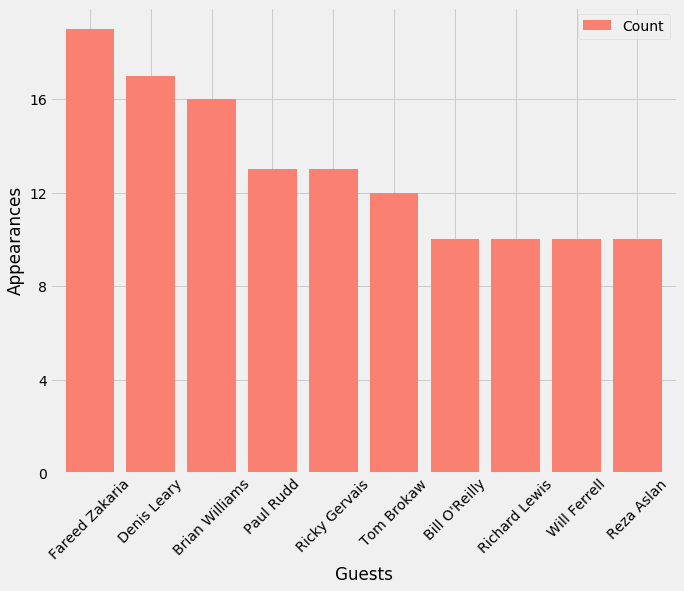

In [31]:
ax = top_appearances.plot.bar(color='#FA8072',width=0.8,figsize=(10,8))
ax.tick_params()
ax.set(xlabel='Guests',
       ylabel='Appearances',
       yticks=range(0,20,4),
       xticklabels=top_appearances['Guest']);
plt.xticks(rotation=45);